In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
diabetes_data = pd.read_csv('diabetes.csv')


In [3]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_data.shape

(108, 9)

In [5]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
diabetes_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

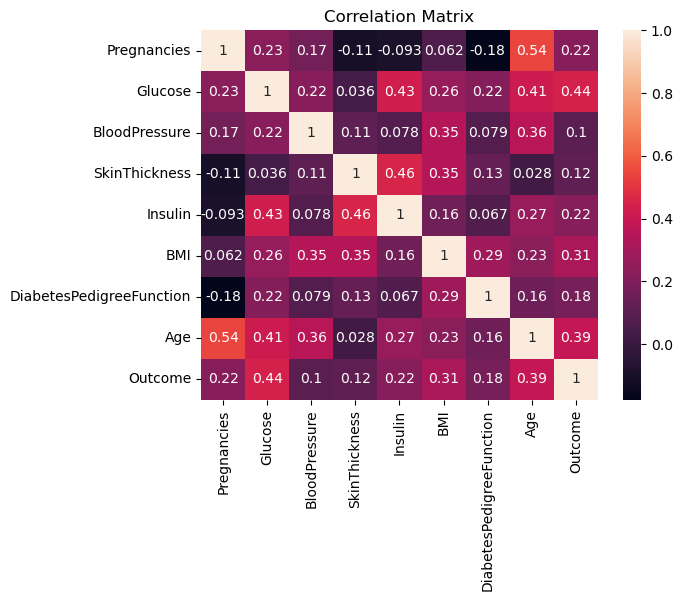

In [8]:
sns.heatmap(diabetes_data.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

<Figure size 1500x900 with 0 Axes>

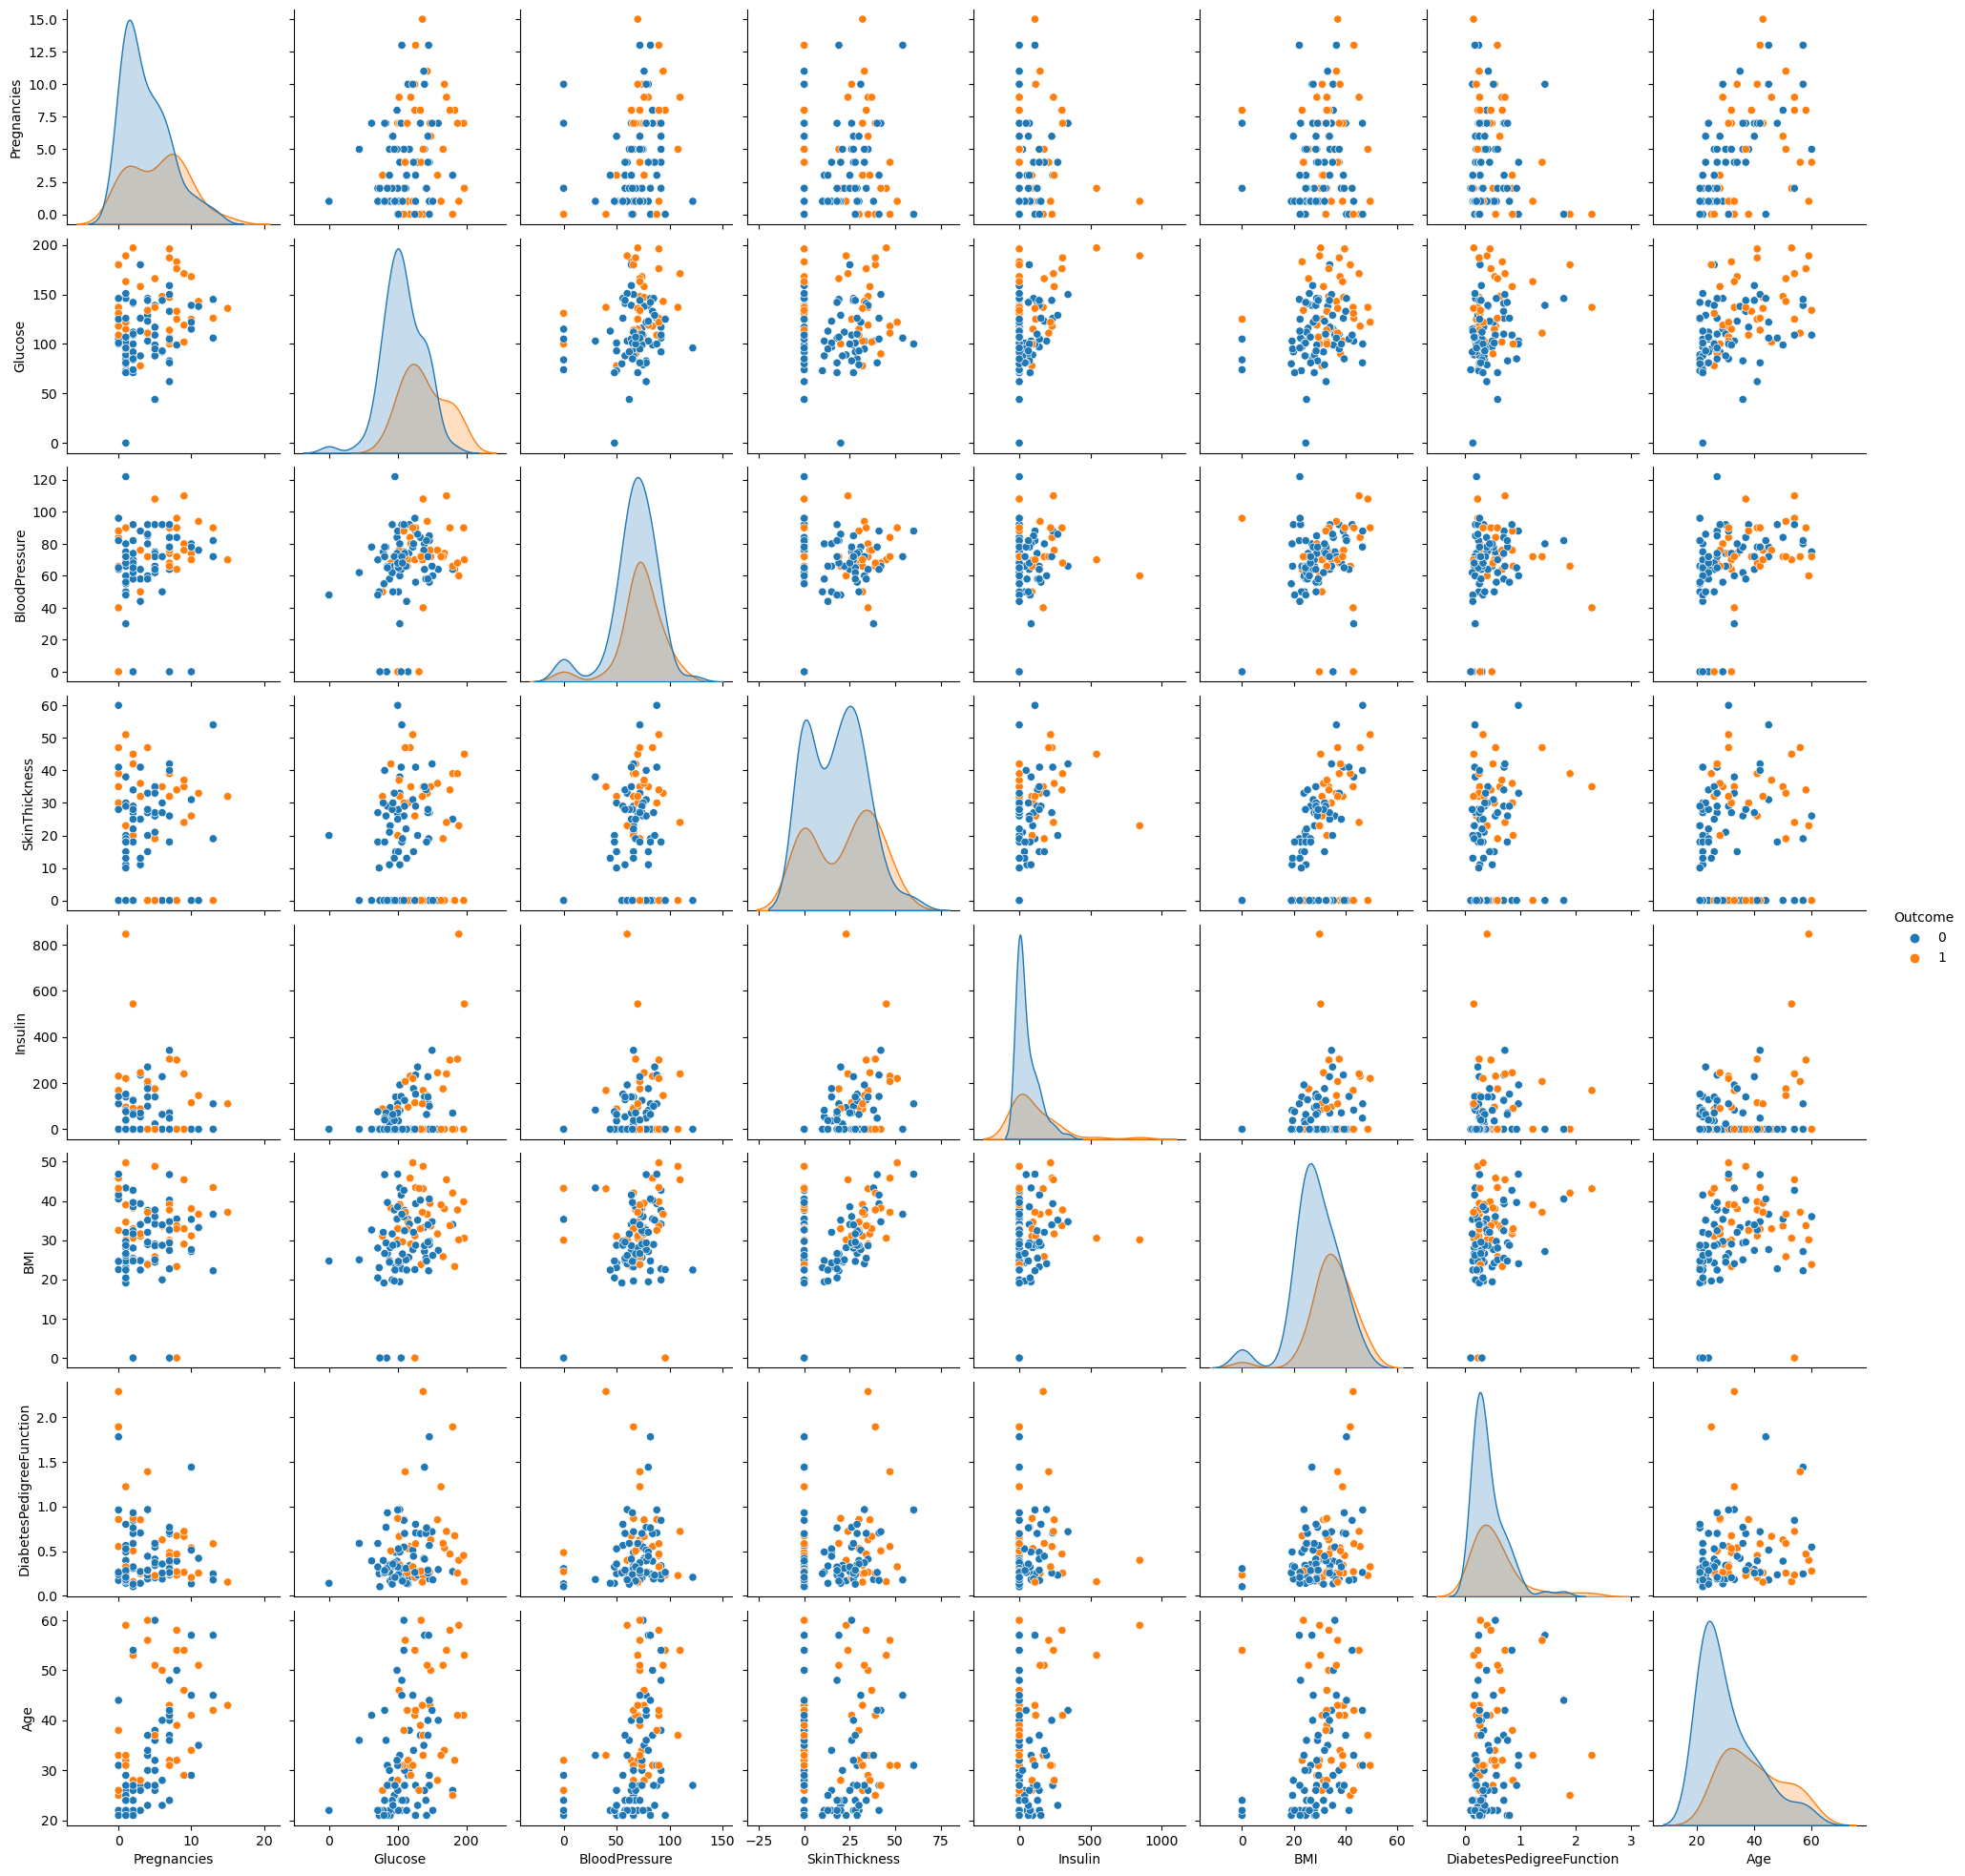

In [20]:
plt.figure(figsize = (15,9))
sns.pairplot(diabetes_data, hue = 'Outcome')

plt.show()

Glucose, Insulin, BMI are my chosen Feature columns, and Outcome column is my Label column.

In [9]:
model_dataset = diabetes_data[['Glucose', 'Insulin', 'BMI','Outcome']]

In [10]:
model_dataset.head()

,Glucose,Insulin,BMI,Outcome
0,148,0,33.6,1
1,85,0,26.6,0
2,183,0,23.3,1
3,89,94,28.1,0
4,137,168,43.1,1


In [11]:
X= model_dataset.iloc[:,:3]
y = model_dataset.iloc[:,3]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 35)

In [13]:
scaler = StandardScaler()

In [14]:
X_train = scaler.fit_transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

In [16]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
y_pred = knn.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f'The acccuracy score of the model is {accuracy}')

The acccuracy score of the model is 0.7727272727272727
